# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Start Building URL.
#source refernce
#https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


Cities = []
Lats = []
Lons = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Max_Temp = []
Wind = []

# Add to the query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#loop through sets of 50
set_size = 50
i=1

set_counter = 1

print('Beginning Data Retrieval')    
print('-----------------------------')
#loop through the cities
for city in cities:
    response=requests.get(query_url+city).json()
    try:
        if i > set_size:
            # Wait for 30 seconds so we don't lock our API Key due to overuse
            time.sleep(30)
            i=1
            set_counter += 1        
        print('Processing Record '+str(i)+' of Set '+str(set_counter)+' | '+city)
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Max_Temp.append(response['main']['temp_max'])
        Wind.append(response['wind']['speed'])
        Cities.append(city)
        Lats.append(lats[i])
        Lons.append(lngs[i])
        i+=1
    except:
        print('City not found. Skipping...')
print('-----------------------------')
print('Data Retrieval Complete ')    
print('-----------------------------')    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 4 of Set 1 | chinsali
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | bilma
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | sambava
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | qujing
Processing Record 14 of Set 1 | malanje
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | chebsara
Processing Record 17 of Set 1 | reconquista
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | evensk
Processing Record 20 of Set 1 | kapaa

Processing Record 26 of Set 4 | iquique
Processing Record 27 of Set 4 | guaratinga
Processing Record 28 of Set 4 | clyde
Processing Record 29 of Set 4 | maine-soroa
Processing Record 30 of Set 4 | herat
Processing Record 31 of Set 4 | concordia
Processing Record 32 of Set 4 | san julian
Processing Record 33 of Set 4 | poum
Processing Record 34 of Set 4 | moose factory
Processing Record 35 of Set 4 | pacific grove
Processing Record 36 of Set 4 | te anau
Processing Record 37 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 4 | gizo
Processing Record 38 of Set 4 | allapalli
Processing Record 39 of Set 4 | fukue
Processing Record 40 of Set 4 | vuktyl
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | les cayes
Processing Record 43 of Set 4 | ostersund
Processing Record 44 of Set 4 | heihe
Processing Record 45 of Set 4 | saint-joseph
Processing Record 46 of Set 4 | nioki
Processing Record 47 of Set 4 | igrejinha
Processing Record 48 of Se

Processing Record 42 of Set 7 | zhigansk
Processing Record 43 of Set 7 | ambon
Processing Record 44 of Set 7 | katsuura
Processing Record 45 of Set 7 | twin falls
Processing Record 46 of Set 7 | bandarbeyla
Processing Record 47 of Set 7 | makakilo city
Processing Record 48 of Set 7 | vardo
Processing Record 49 of Set 7 | kahului
Processing Record 50 of Set 7 | amahai
Processing Record 1 of Set 8 | talnakh
Processing Record 2 of Set 8 | karratha
Processing Record 3 of Set 8 | kurilsk
Processing Record 4 of Set 8 | kuusamo
Processing Record 5 of Set 8 | lagoa
Processing Record 6 of Set 8 | abaete
Processing Record 7 of Set 8 | sorland
Processing Record 8 of Set 8 | bonfim
Processing Record 9 of Set 8 | puri
Processing Record 10 of Set 8 | kegayli
City not found. Skipping...
Processing Record 10 of Set 8 | kaseda
Processing Record 11 of Set 8 | peleduy
Processing Record 12 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 12 of Set 8 | labuhan
Processing Record 13 of Set 

Processing Record 17 of Set 11 | bokhan
Processing Record 18 of Set 11 | pangody
Processing Record 19 of Set 11 | naze
Processing Record 20 of Set 11 | tiarei
Processing Record 21 of Set 11 | ulladulla
Processing Record 22 of Set 11 | port hedland
Processing Record 23 of Set 11 | vanavara
Processing Record 24 of Set 11 | bonthe
Processing Record 25 of Set 11 | chom bung
City not found. Skipping...
Processing Record 25 of Set 11 | bemidji
Processing Record 26 of Set 11 | saleaula
City not found. Skipping...
Processing Record 26 of Set 11 | hambantota
Processing Record 27 of Set 11 | aljojuca
Processing Record 28 of Set 11 | dubti
Processing Record 29 of Set 11 | svetlaya
Processing Record 30 of Set 11 | betare oya
Processing Record 31 of Set 11 | ciudad bolivar
Processing Record 32 of Set 11 | shchelkun
Processing Record 33 of Set 11 | santa paula
Processing Record 34 of Set 11 | sabang
Processing Record 35 of Set 11 | staroye drozhzhanoye
Processing Record 36 of Set 11 | lagunas
Proces

In [4]:
#load the data into a dataframe for plotting
weather_dict = {
    'City': Cities,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date':Date,
    'Humidity':Humidity,
    'Lat':Lats,
    'Lon':Lons,
    'Max Temp':Max_Temp,
    'Wind Speed':Wind
}
weather_data = pd.DataFrame(weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Export the city weather data to csv
weather_data.to_csv(output_data_file, index = None, header=True)

In [6]:
#Get a count of the city weather data
weather_data.count()

City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Lat           589
Lon           589
Max Temp      589
Wind Speed    589
dtype: int64

In [7]:
#Preview the city weather data
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,college,40,US,1579133113,77,-8.697201,-10.123771,5.00,5.82
1,georgetown,20,MY,1579132928,78,-86.288842,-78.655088,78.80,4.70
2,ushuaia,75,AR,1579132802,75,-32.751615,34.634477,42.80,31.09
3,chinsali,100,ZM,1579133392,98,-11.209647,32.084709,65.53,3.80
4,upernavik,100,GL,1579133089,97,76.277068,-59.303728,-3.24,3.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
#source reference:
#https://www.w3schools.com/python/python_datetime.asp
today = datetime.datetime.now().strftime("%m/%d/%Y")

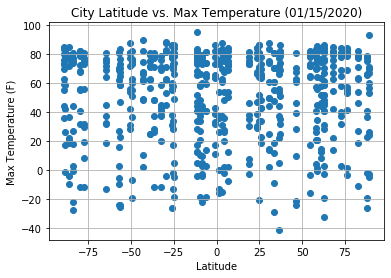

In [11]:
x_data = weather_data['Lat']
y_data = weather_data['Max Temp']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Max Temperature ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_max_temp.png')
plt.show()

#### Observation - the max temperature is generally below 100 can dip below -20 regardless of latitude

#### Latitude vs. Humidity Plot

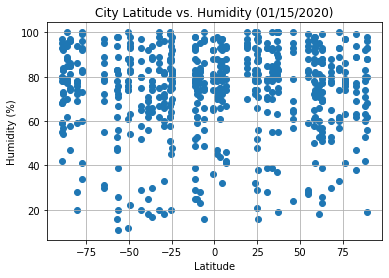

In [12]:
x_data = weather_data['Lat']
y_data = weather_data['Humidity']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Humidity ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_humidity.png')
plt.show()

#### Observation - the humidity is generally above 60% regardless of latitude.

#### Latitude vs. Cloudiness Plot

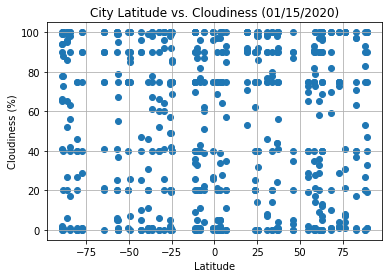

In [13]:
x_data = weather_data['Lat']
y_data = weather_data['Cloudiness']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Cloudiness ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_cloudiness.png')
plt.show()

#### Observation - the cloudiness is generally similar regardless of latitude

#### Latitude vs. Wind Speed Plot

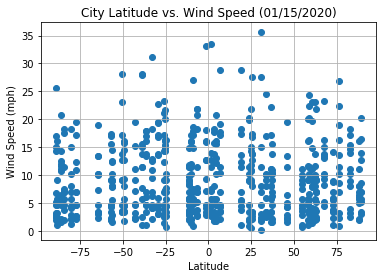

In [14]:
x_data = weather_data['Lat']
y_data = weather_data['Wind Speed']
plt.scatter(x_data,y_data)
plt.title('City Latitude vs. Wind Speed ('+today+')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('../Images/plot_lat_vs_wind.png')
plt.show()

#### Observation - the wind is generally below 20 mph however tends to gust above 75 and below -25 latitude